# Memento Nettoyer et analyser les données

## Vocabulaire

- <u>Individus</u> : Unité d'observation (ligne du dataset : clients, personne, animaux, mesures physique...)
- <u>Variables</u> : Caractéristiques des <b>individus</b>
- <u>Population</u> : Ensemble des <b>individus</b>. Sa taille est noté <b>N</b>.
- <u>Echantillon</u> : Fraction d'<b>individus</b> sélectionnés d'une <b>population</b>. Sa taille est noté <b>n</b>
- <u>Jeu de données</u> : Ensemble des informations récoltées sur les <b>individus</b> de l'<b>échantillon</b>, présenté sous forme de tableau. Un ligne est un <b>individu</b>, une colonne est une <b>variable</b>.
- <u>Statistiques</u> : Fait d'observer et de décrire objectivement un phénomère passé.
- <u>Probabilités</u> : Fait de modéliser, essayer de comprendre les risques ou chances qu'un évènement se produise.
- <u>Statistiques descriptives</u> : Présenter, décrire et résumer le jeu de données à l'aide de graphique et de mesures (moyenne, écart-type...) sur une ou deux variables.
- <u>Statistiques multidimensionnelle</u> : Appelée Analyse Exploratoire de Données - AED, c'est l'étude la relation entre 3 variables ou plus.
- <u>Statistiques inférentielles</u> : Analyser les données d'un sous ensemble d'une population pour en déduire les caractérisques globales de la population.
- <u>Modélisation statistique</u> : Observer les variables d'un échantillon, et ensuite de formaliser les observations par des règles mathématiques (modèle probalistique) dans le but d'en faire des prédictions.
- <u>Imputation</u> : Consiste à deviner une valeur manquante.
- <u>Amputation</u> : Le fait de supprimer les individus avec les valeurs manquantes.
- <u>Outlier aberrante</u> : Valeur manifestement fausse
- <u>Outlier atypique</u> : Valeur qui sort du lot mais pas forcément fausse.
- <u>Biais</u> : Le fait de modifier, supprimer des valeurs, individus ou d'effectuer des imputations sur le jeu de données.
- <u>Analyse univariée</u> : Est une analyse effectuée sur une seule variable à la fois.
- <u>Analyse bivariée</u> : Est une analyse menée entre deux variables. Elle permet d'établir des recommandations métier pertinentes sur les individus à partir de la compréhension du comportement d'une variable par rapport à une autre.
    - Diagramme de dispersion (scatterplot) quand 2 variables quantitatives.
    - Tableau de contingence quand 2 variables qualitatives.
- <u>Indice statistique</u> : Statistique contruite à partir d'une vision, à partir de connaissance d'un domaine (ex :économie)
- <u>Indicateur statistique</u> : Statistique contruit de façon neutre, construite sans à-priori et sans intention derrière comme une moyenne.
- <u>Discrétisation</u> : Ou "découpage en classes" vise à simplifier des données brutes (données continues) en rassemblant les valeurs qui sont proches ou se ressemblent en différentes classes, présentées sous forme de fourchettes de valeurs (ex :de 0 à 10, de 10 à 25, de 25 à 33, etc.).
- <u>Classe modale</u> : Correspond à la classe qui apparaît le plus de fois
- <u>Médiane</u> : Est le point milieu d’un jeu de données, de sorte que 50 % des unités ont une valeur inférieure ou égale à la médiane et 50 % des unités ont une valeur supérieure ou égale.
- <u>Variance</u> : Est la somme des différences à la moyenne au carré, divisée par l'effectif total.
- <u>Ecart-type</u> : L'écart-type correspond à la racine carrée de la variance.
- <u>Ecart moyen absolue</u> : Similaire à la variance, à la différence que le calcul fait intervenir la valeur absolue plutôt que le passage au carré.
- <u>Coefficient de variation</u> : Est l'écart-type empirique divisé par la moyenne
- <u>Ecart interquartile</u> : Est la différence entre le 3e quartile et le 1er quartile.
- <u>Skewness empirique</u> : Est une mesure d'asymétrie. L’asymétrie d’une distribution traduit la régularité (ou non) avec laquelle les observations se répartissent autour de la valeur centrale.
    - Si γ1==0 alors la distribution est symétrique.
    - Si γ1>0 alors la distribution est étalée à droite.
    - Si γ1<0 alors la distribution est étalée à gauche.
- <u>Kurtosis empirique</u> : N'est pas une mesure d'asymétrie, mais c'est une mesure d'aplatissement.
- <u>Aplatissement : </u> S’interprétre à la condition que la distribution soit symétrique. En fait, on compare l'aplatissement par rapport à la distribution la plus célèbre, appelée distribution normale.
    - Si γ2==0 alors la distribution a le même aplatissement que la distribution normale.
    - Si γ2>0 alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.
    - Si γ2<0 alors les observations sont moins concentrées : la distribution est plus aplatie.
- <u>Les mesures de concentration</u> : Permet d'évaluer si une variable est également répartie (ou non) entre différents individus.
- <u>La courbe de Lorenz</u> : Permet de représenter la répartition d'une variable au sein d'une population, notamment si elle est égalitaire ou non.
- <u>La médiale</u> : la courbe de Lorenz est un escalier de hauteur 1. La donnée médiale, c'est simplement la qui se trouve à la moitié de la hauteur : 0,5.
- <u>Indice de Gini</u> : La courbe de Lorenz n'est pas une statistique, c'est une courbe ! Du coup, il existe l'indice de Gini. Il permet d'évaluer de façon chiffrée cette répartition. Il correspond à deux fois l'aire sous la courbe de Lorenz.
- <u>Corrélation</u> : La notion de relation entre variables est appelée corrélation. Dire que deux variables sont corrélées signifie que si on connaît la valeur d’une variable, alors il est possible d’avoir une indication (plus ou moins précise) sur la valeur d’une autre variable.
- <u>Corrélations fallacieuses</u> : Quand 2 variables sont corrélées sans qu’il n’y ait aucun lien entre elles.
- <u>Coefficient de détermination</u> : Le coefficient de détermination noté R au carré
 permet d'évaluer la qualité d'un modèle. Il  représente le pourcentage de variation expliquée de la variable cible par notre modèle. R² = SCE / SCT
- <u>Méthode des moindres carrés ordinaire (MCO)</u> : Elle consiste à minimiser la somme des carrés des écarts, entre chaque point du nuage de régression et son projeté, parallèlement à l'axe des ordonnées, sur la droite de régression.
- <u>ANOVA</u> : ANalysis Of VAriance, analyse de la variance, utilisé en statistiques inférentielles. Il s’agit ici de l’analyse de la variance. Elle est similaire à LDA (analyse discriminante linéaire) à l’exception qu’il est exploité en utilisant une ou plusieurs variables indépendantes catégorielles et une variable dépendante continu. Il fournit également un test statistique pour savoir si les moyennes de plusieurs groupes sont égales ou non.
- <u>SCT = SCE + SCR</u> : Variation Totale = Variation Interclasse + Variation Intraclasse
- <u>corrélation de Pearson</u> : Elle est utilisé pour mesurer et quantifier la dépendance linéaire entre deux variables continues X et Y, où X est la variable et Y la variable prédite.
- <u>corrélation de Spearman</u> : Est plus générale et est l’équivalent non paramétrique de la corrélation de Pearson. Le coefficient de Spearman permet de détecter des tendances monotones. Lorsque la tendance est affine, il se comporte de façon similaire au coefficient de Pearson. En revanche, il sera plus élevé que la corrélation de Pearson si la tendance est monotone mais non affine.
- <u>Chi-carré</u> :  Il s’agit d’un test statistique appliqué aux groupes de variables catégorielles pour évaluer la probabilité de corrélation ou d’association entre ces variables en utilisant leur distribution de fréquence.

In [68]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt
import statsmodels.api as sm
import seaborn as sns

operations = pd.read_csv('./resources/operations.csv')

operations.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


## Les variables

### Variable quantitative

Variable avec une <b>valeur numérique</b> à condition que ces valeurs expriment une quantité et qu'il est possible d'effectuer une opération arithmétique.


Une variable quantitative est soit discrète (valeur précise 1,2,3,4...) , soit continue (variable float ).

### Variable qualitative

Variable avec une valeur qui représente une <b>modalité</b> (catégorie).

Une variable est dite <b>ordinale</b>, si ses modalités peuvent être ordonées. A l'inverse elle est dite <b>nominale</b> 

### Variable dichotomique

Variable qualitative qui ne prend que deux modalités (0/1, true/false). Aussi appelée variable binaire, booléenne.



## Type d'erreurs

- Valeur manquante : Cellule vide.
- Erreur lexicale : La cellule attend un nom mais possède un chiffre.
- Erreur d'irrégularité : La cellule attend une valeur en cm mais elle possède une valeur en mètre.
- Erreur de formatage : La cellule ne possède pas le bon format de date par exemple.
- Doublon : Présence de plus d'une fois d'un individu.
- Outlier : Valeur abérente/atypique d'une variable, par exemple avoir une taille de 3.5 pour une femme.



In [2]:
data = pd.read_csv('./resources/personnes.csv')
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,24,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


## Détecter les erreurs

In [3]:
# Les valeurs manquantes
print(data.isnull())

   prenom  email  date_naissance   pays  taille
0   False  False           False  False   False
1   False  False           False   True   False
2   False  False           False  False   False
3   False  False           False  False   False
4   False  False           False  False   False
5   False  False           False  False   False
6   False  False            True  False   False


In [4]:
# Le nombre de valeur manquante par variable
print(data.isnull().sum())

prenom            0
email             0
date_naissance    1
pays              1
taille            0
dtype: int64


In [5]:
## Les doublons - Dans le cas où l'identifiant des personnes est l'adresse email
print(data.loc[ data['email'].duplicated(keep=False), : ])

   prenom                   email date_naissance   pays taille
1  Samuel  samuel_329@example.com     20/09/2001    NaN  1.67m
6  samuël  samuel_329@example.com            NaN  Bénin  1.45m


In [6]:
# Traitement des pays inconnus
VALID_COUNTRIES = [ 'France', 'Côte d\'ivoire', 'Madagascar', 'Bénin', 'Allemagne', 'USA' ]

# Tous les pays qui ne sont pas dans la liste des pays VALID_COUNTRIES ( ~ tilde utilisé pour la négation ) 
mask = ~data['pays'].isin(VALID_COUNTRIES)
# On vérifie que l'on a bien le masque d'appliqué
data.loc[mask, 'pays']

1    NaN
5     24
Name: pays, dtype: object

In [7]:
# On modifie les valeurs erronées par une valeur inconnue
data.loc[mask, 'pays'] = np.NaN
data['pays']

0           France
1              NaN
2    Côte d'ivoire
3           France
4       Madagascar
5              NaN
6            Bénin
Name: pays, dtype: object

In [8]:
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [9]:
# Le cas des deux emails pour un individu
# On utlise la méthode split sur la variable email du df avec le paramètre expand=True
# afin d'obtenir une tableau à deux dimensions.
data['email'].str.split(',', expand=True)

,0,1
0,leila@example.com,None
1,samuel_329@example.com,None
2,choupipoune@supermail.eu,None
3,marco23@example.com,mc23@supermail.eu
4,helloworld@supermail.eu,None
5,hanna2019@supermail.eu,None
6,samuel_329@example.com,None


In [10]:
# Ici on modifie la colonne email avec la première adresse email de chaque individu
data['email'] = data['email'].str.split(',', expand=True)[0]
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,marco23@example.com,10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [11]:
# Vu que pour les tailles toutes la valeurs se terminent par m on va retirer ds un premier temps le dernier caractère.
data_tmp = data.copy()
data_tmp['taille'] = data_tmp['taille'].str[:-1]
data_tmp

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153c
3,Marc,marco23@example.com,10/02/1978,France,1.65
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45
6,samuël,samuel_329@example.com,NaN,Bénin,1.45


In [12]:
# Ensuite on effectue une convertion numérique aux valeurs et si la convertion est impossible alors on set une valeur par défaut NaN
# Ici 153c va être converti en Nan vu qu'il n'est pas possible de convertir une chaîne alphanumeric en numeric
data_tmp['taille'] = pd.to_numeric(data_tmp['taille'], errors='coerce')
data_tmp

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,NaN
3,Marc,marco23@example.com,10/02/1978,France,1.65
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45
6,samuël,samuel_329@example.com,NaN,Bénin,1.45


In [13]:
# Et ensuite on affecte les valeurs manquante de taille par une valeur moyenne
data_tmp.loc[ data_tmp['taille'].isnull(), 'taille' ] = round(data_tmp['taille'].mean(), 2)
data_tmp

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,1.84
3,Marc,marco23@example.com,10/02/1978,France,1.65
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45
6,samuël,samuel_329@example.com,NaN,Bénin,1.45


In [14]:
# Mais en ayant une valeur outlier pour Hanna au niveau de la taille, la moyenne appliqué à la taille de Radia ne reflète pas la réalité
# En effet à la base on avait 153cm et mainteant on a 1.84m
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,marco23@example.com,10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [15]:
# Dans le cas où notre jeu de données actuel ne possède que l'unité cm et m
# La variable value correspond à la valeur de la cellule
def convert_cm_to_m(value):
    # Si l'unité est le cm alors on effectue la convertion
    if value[-2:] == 'cm':
        return str( int(value[:-2]) / 100)
    #sinon on retourne la valeur numérique sans l'unité
    else:
        return value[:-1]

# On applique uniquement sur la colonne taille la fonction de convertion cm en m
data['taille'] = data['taille'].apply(convert_cm_to_m)
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,1.53
3,Marc,marco23@example.com,10/02/1978,France,1.65
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45
6,samuël,samuel_329@example.com,NaN,Bénin,1.45


In [16]:
# Pour la date on unifie les formats
# Sinon on fonction de l'importance de la donnée on devrait écrire une fonction de convertion
data['date_naissance'] = pd.to_datetime( data['date_naissance'], format="%d/%m/%Y", errors='coerce')
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,1990-01-23,France,1.49
1,Samuel,samuel_329@example.com,2001-09-20,NaN,1.67
2,Radia,choupipoune@supermail.eu,NaT,Côte d'ivoire,1.53
3,Marc,marco23@example.com,1978-02-10,France,1.65
4,Heri,helloworld@supermail.eu,2008-03-05,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,1970-01-01,NaN,3.45
6,samuël,samuel_329@example.com,NaT,Bénin,1.45


In [17]:
data = pd.read_csv('./resources/operations-cleaned.csv')
data

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE
...,...,...,...,...,...
303,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE
304,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE
305,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE
306,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT


## Distribuation empirique

La distribution empirique d'une variable, c'est l’ensemble des valeurs (ou modalités) prises par cette variable, ainsi que leurs effectifs / fréquences associés.

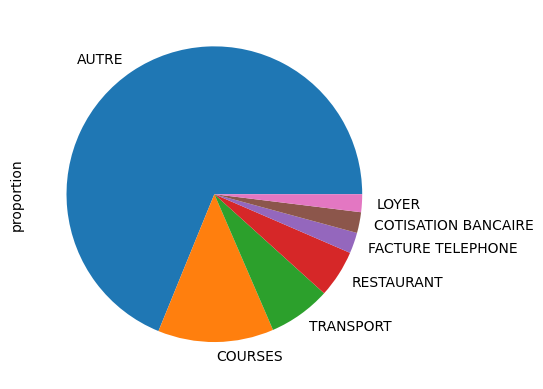

In [18]:
# Pour obtenir un tableau numéric du nombre de fois qu'apparaît une valeur dans la colonne (effectif de la variable) on utilise 
# la méthode .value_counts(), pour obtenir la fréquence on utilise le paramètre normalize = True
data['categ'].value_counts(normalize=True).plot(kind="pie")
plt.show()

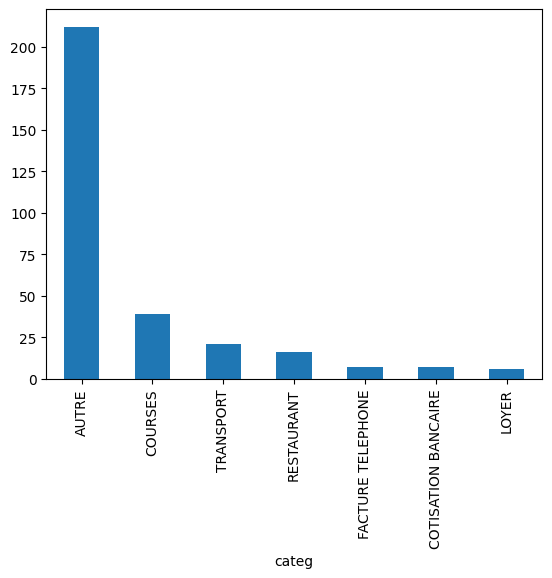

In [19]:
data['categ'].value_counts(normalize=False).plot(kind="bar")
plt.show()


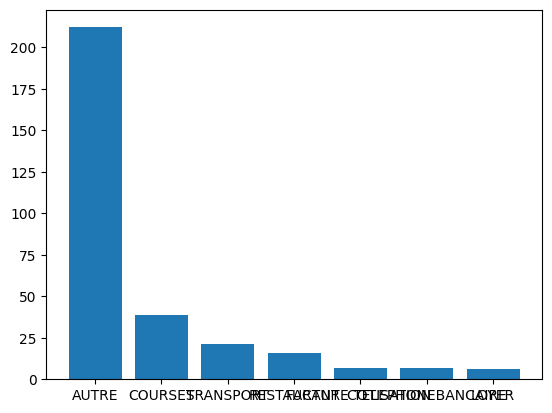

In [20]:
# La version native avec plt.bar()
t = data['categ'].value_counts(normalize=False).reset_index()

plt.bar(height=t['count'], x=t['categ'])
plt.show()

Il est clair qu'il est plus simple d'utiliser la méthode .plot() sur une variable pour en avoir une représentation graphique.

### Variable quantitative

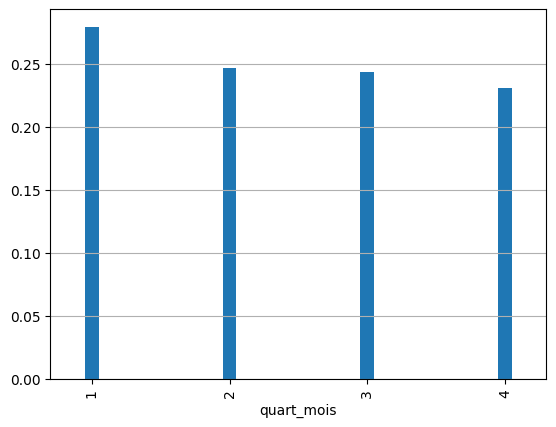

In [21]:
# On crée un nouvelle variable pour indiqué l'avancée dans le mois
data['date_operation'] = pd.to_datetime(data['date_operation'], errors='coerce')
data['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data["date_operation"].dt.day]

# Diagramme en bâtons fin pour les variables discrètes (valeur précise)
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.grid(axis="y")
plt.show()

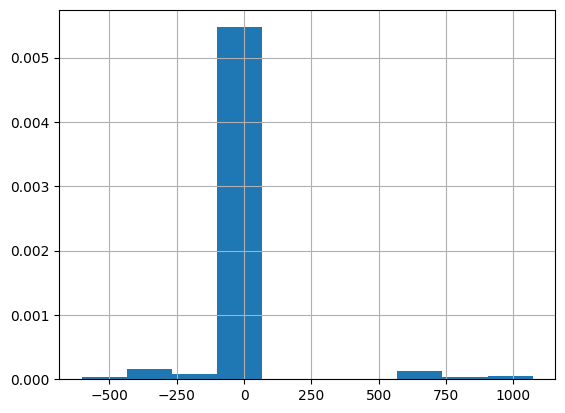

In [22]:
# Représente une variable continue (float compris dans un intervalle)
# Ici on agrège les valeurs en classes. Il y a une classe importante de montant autour de zero. Grosso modo [-80:80]
data['montant'].hist(density=True)
plt.show()

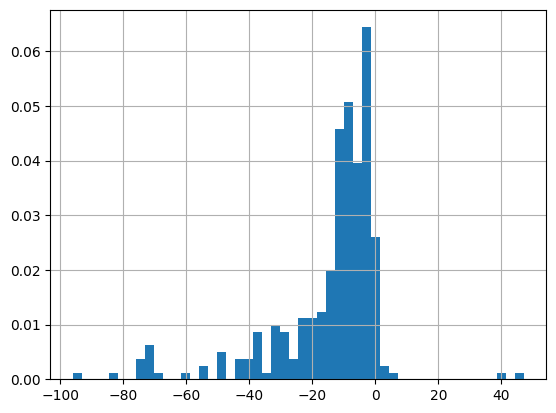

In [23]:
# On affine le graphique en montrant que les montants inférieur à un débit/crédit de 100
# bins correspond au nombre de classe que l'on souhaite avoir
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=50)
plt.show()

In [24]:
# présentation sous forme de tableau de la distribution empirique d'une variable

effectifs = data['categ'].value_counts()
effectifs

categ
AUTRE                  212
COURSES                 39
TRANSPORT               21
RESTAURANT              16
FACTURE TELEPHONE        7
COTISATION BANCAIRE      7
LOYER                    6
Name: count, dtype: int64

In [25]:
modalites = effectifs.index
modalites

Index(['AUTRE', 'COURSES', 'TRANSPORT', 'RESTAURANT', 'FACTURE TELEPHONE',
       'COTISATION BANCAIRE', 'LOYER'],
      dtype='object', name='categ')

In [26]:
# On initialise notre df avec les modalités
tab = pd.DataFrame(modalites, columns=['categ'])
tab

,categ
0,AUTRE
1,COURSES
2,TRANSPORT
3,RESTAURANT
4,FACTURE TELEPHONE
5,COTISATION BANCAIRE
6,LOYER


In [27]:
# On récupère la valeur de l'effectif pour chaque catégorie
tab['n'] = effectifs.values
tab

,categ,n
0,AUTRE,212
1,COURSES,39
2,TRANSPORT,21
3,RESTAURANT,16
4,FACTURE TELEPHONE,7
5,COTISATION BANCAIRE,7
6,LOYER,6


In [28]:
# On calcule la fréquence nombre d'occurence / le nombre total d'enregistrement
tab['f'] = tab['n'] / len(data)
tab

,categ,n,f
0,AUTRE,212,0.688312
1,COURSES,39,0.126623
2,TRANSPORT,21,0.068182
3,RESTAURANT,16,0.051948
4,FACTURE TELEPHONE,7,0.022727
5,COTISATION BANCAIRE,7,0.022727
6,LOYER,6,0.019481


In [29]:
# On calcule la fréquence cumulé
tab = tab.sort_values('categ')
tab['F'] = tab['f'].cumsum()
tab

,categ,n,f,F
0,AUTRE,212,0.688312,0.688312
5,COTISATION BANCAIRE,7,0.022727,0.711039
1,COURSES,39,0.126623,0.837662
4,FACTURE TELEPHONE,7,0.022727,0.860390
6,LOYER,6,0.019481,0.879870
3,RESTAURANT,16,0.051948,0.931818
2,TRANSPORT,21,0.068182,1.000000


## Mesure de tendance centrale

In [30]:
# Le mode : Correspond à la classe qui apparaît le plus de fois
data['categ'].mode()

0    AUTRE
Name: categ, dtype: object

In [31]:
# La moyenne - Note : Sujet aux outliers, si un extrême est présent la moyenne en sera affectée.
data['montant'].mean()

2.8725649350649354

In [32]:
# La médiane
data['montant'].median()

-9.6

In [33]:
# Exemple pour comprendre comment fonctionne la médiane
rangs = pd.DataFrame([24.1,25.0,25.2,25.6,25.7,26.1,27.8])
rangs

,0
0,24.1
1,25.0
2,25.2
3,25.6
4,25.7
5,26.1
6,27.8


In [34]:
# Il y a n = 7 valeurs, un nombre impair. La médiane correspondra donc à la valeur de rang
# (n+1) ÷ 2 = (7 +1) ÷ 2 = 4
# Le temps médian est de 25,6 secondes.
rangs.median()

0    25.6
dtype: float64

In [35]:
rangs = pd.DataFrame([24.1,24.7,25.0,25.2,25.6,25.7,26.1,27.8])
rangs

,0
0,24.1
1,24.7
2,25.0
3,25.2
4,25.6
5,25.7
6,26.1
7,27.8


In [36]:
# Il y a maintenant n = 8 valeurs, un nombre pair. La médiane correspondra à la moyenne entre la valeur de rang
# (n ÷ 2 = 8 ÷ 2 = 4 )
# et la valeur de rang
# (n ÷ 2) + 1 = (8 ÷ 2) +1 = 5
# Le temps médian est donc de (25,2 + 25,6) ÷ 2 = 25,4 secondes.
rangs.median()

0    25.4
dtype: float64

In [37]:
# Pour les ensembles de données plus grands, il est possible d’utiliser la distribution de fréquence 
# relative cumulée pour aider à identifier la médiane. La médiane sera la plus petite valeur 
# pour laquelle la fréquence relative cumulée atteint au moins 50 %. 

menages = pd.DataFrame([])
menages['taille'] = [2,3,4,5,6,7,8,9,10]
menages['f'] = [3,4,10,4,2,3,1,2,1]
menages['f-relative'] = [10.0,13.3,33.3,13.3,6.7,10.0,3.3,6.7,3.3]
menages['f-cum'] = [3,7,17,21,23,26,27,29,30]
menages['f-cum-relative'] = [10,23.3,56.7,70.0,76.7,86.7,90.0,96.7,100]
menages

,taille,f,f-relative,f-cum,f-cum-relative
0,2,3,10.0,3,10.0
1,3,4,13.3,7,23.3
2,4,10,33.3,17,56.7
3,5,4,13.3,21,70.0
4,6,2,6.7,23,76.7
5,7,3,10.0,26,86.7
6,8,1,3.3,27,90.0
7,9,2,6.7,29,96.7
8,10,1,3.3,30,100.0


In [38]:
# La médiane sera égale à taille = 4, car c’est la plus petite valeur 
# pour laquelle la fréquence cumulée dépasse 50 %.
menages.loc[ (menages['f-cum-relative'] > 50), : ].iloc[0]

taille             4.0
f                 10.0
f-relative        33.3
f-cum             17.0
f-cum-relative    56.7
Name: 2, dtype: float64

Sur un histogramme, le mode est le "point le plus haut" de la distribution, la médiane est la valeur qui divise la surface en deux et la moyenne est le centre de gravité de la distribution

## Mesure de dispersion

#### Variance Empirique

In [39]:
# Variance empirique
# Il s'agit de la somme des (xi - x-bar)² / n
# Par exemple pour la variable montant, 
# xi correspond à la valeur ponctuelle du montant, 
# x-bar correspond à la moyenne du montant 
# n correspond au nombre total d'occurence
# Soit : ( (x1 - x-bar)² + (x2 - x-bar)² + ... + (xn - x-bar)² ) / n

data['montant'].var()

31007.638040630954

In [40]:
# Variance empirique corrigé est la version où le biais de l'estimateur est corrigé
data['montant'].var(ddof=0)

30906.963891148385

### Ecart-type

In [41]:
# Racine carré de la variance
data['montant'].std()

176.08985785851198

### Coefficient de variation

In [42]:
# l'écart-type empirique divisé par la moyenne
data['montant'].std() / data['montant'].mean()

61.30056651079026

### Ecart interquartile

Les quantiles servent à calculer les intervalles interquantiles, qui sont les caractéristiques indicatrices de dispersion. Interquartile on divise cette dispersion en quart.

L'écart interquartile est la différence entre le 3e quartile et le 1er quartile :

    IQ=Q3−Q1

Cet intervalle va mesurer l’écart des valeurs autour de la valeur médiane qui réunit 50% de la population.

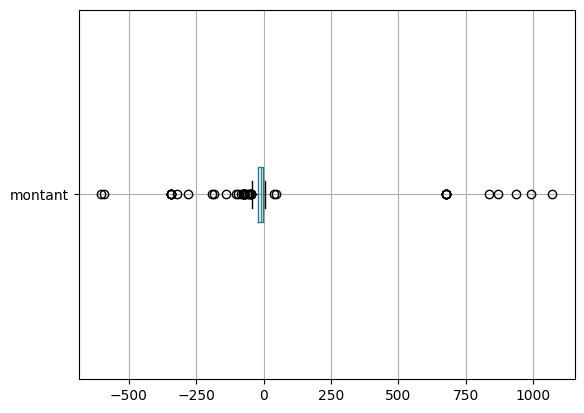

In [43]:
# la boite à moustache (boxplot) représente schématiquement une distribution, 
# en incluant sa dispersion. La boîte est délimitée par Q1 et Q3, et 
# on représente souvent la médiane à l’intérieur de la boîte.

# Si certaines valeurs sont au-dessous de  Q1−1.5IQ ou au-dessus de Q3+1.5IQ, 
# alors on les considère comme des outliers, et on ne les inclut pas dans la moustache

data.boxplot(column="montant", vert=False)
plt.show()

### Ecart Mean Absolute - EMA

Est la moyenne arithmétique des valeurs absolues des écarts à un indicateur de tendance centrale, en général la moyenne ou la médiane.

Par exemple avec la médiane:
EMA=(∑ni=1|xi−Med|) / 2

## Mesure de forme

In [44]:
# skewness empirique

print(data['montant'].mode().loc[0])
print(data['montant'].median())
print(data['montant'].mean())

print(data['montant'].skew())

-1.6
-9.6
2.8725649350649354
3.3618450105098843


In [45]:
# kurtosis empirique
data['montant'].kurtosis()

17.2719048282677

## Mesure de concentration

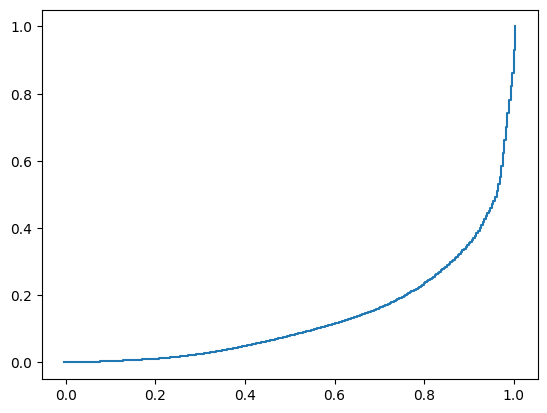

In [46]:
# Courbe de Lorenz
depenses = data[data['montant'] < 0]
# On rend les valeurs positives
dep = -depenses['montant'].values

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

# Pour avoir un axe des abscisses entre 0 et 1
#Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. 
# Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
xaxis = np.linspace(0-1/n,1+1/n,n+1) 

plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [47]:
# Indice de Gini
# Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, 
# on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] 
# qui est à moitié au dessus de 1.
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 

# surface entre la première bissectrice et le courbe de Lorenz
S = 0.5 - AUC 
gini = 2*S
gini

0.7204386813739185

### Analyse de la corrélation entre 2 variables quantitatives

Text(0, 0.5, 'Montant des dépenses')

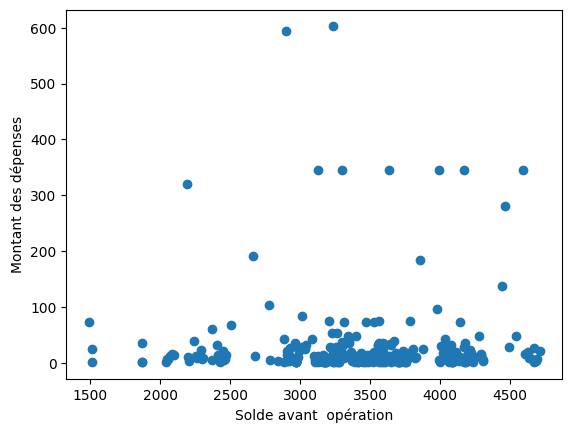

In [48]:
## Diagramme de dispersion (2 variables quantitatives)

plt.scatter(x=depenses['solde_avt_ope'], y=-depenses['montant'])
plt.xlabel("Solde avant  opération")
plt.ylabel("Montant des dépenses")

Pas très lisible. Une alternative consiste à découper l'axe des abscisses en différentes classes.

In [49]:
# Taille de chaque classe
taille = 500
classes = []

tranches = np.arange(1500, max(depenses['solde_avt_ope']), taille )
# On décale d'une demi taille pour se caller au niveau de l'axe des abscisses avec la représentation
# scatter faite précedemment
# tranches += taille/2
tranches

array([1500., 2000., 2500., 3000., 3500., 4000., 4500.])

In [50]:
# On associe la valeur du solde à sa tranche
indices = np.digitize(depenses['solde_avt_ope'], tranches)
indices

array([1, 1, 0, 2, 2, 2, 2, 2, 2, 4, 4, 3, 3, 3, 3, 3, 3, 5, 7, 6, 6, 6,
       6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 5, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 3,
       2, 2, 2, 2, 2])

In [51]:
# Liste des montants des dépenses
-depenses.loc[ :, "montant" ]

0       1.44
1      24.00
2      73.00
5      14.39
6      15.20
       ...  
303    10.64
304     4.80
305     1.92
306    10.00
307    13.58
Name: montant, Length: 291, dtype: float64

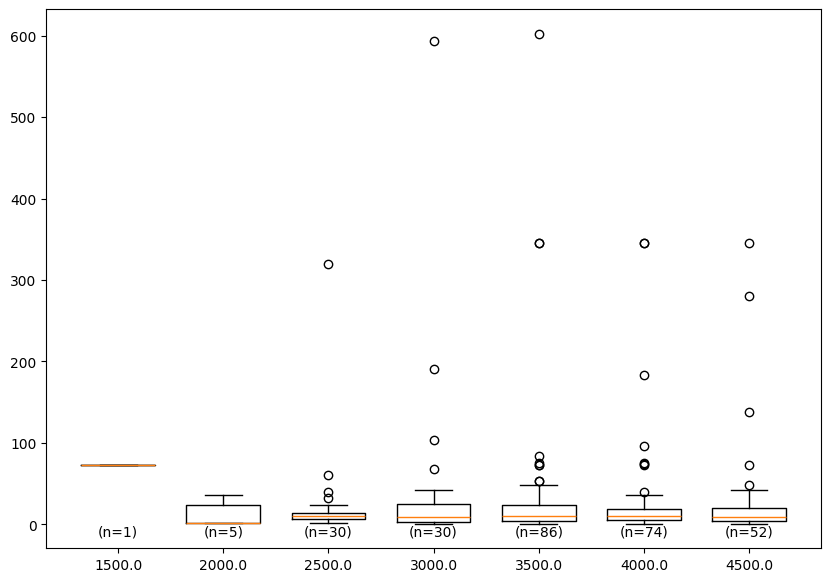

In [52]:
for i, tranche in enumerate(tranches):
    # Ici on récupère les montants des dépenses pour notre tranche en fonction de la liste "indices"
    montants = -depenses.loc[ indices == i, "montant" ]
    if len(montants) > 0:
        c = {
            'valeurs' : montants,
            'centre_classe' : tranche, #(tranches - (taille/2)) # On annule notre décalage sur l'axe x
            'taille' : len(montants),
            'quartiles' : [np.percentile(montants, p) for p in [25,50,75]]
        }        
        classes.append(c)
plt.figure(figsize=(10,7))

valeurs = [c["valeurs"] for c in classes]
positions = [c["centre_classe"] for c in classes]

# affichage des boxplots
# showfliers= False -> n'affiche pas les outliers
plt.boxplot(valeurs, 
            positions= positions,
            showfliers= True, 
            widths= taille*0.7)

# affichage des effectifs de chaque classe
for c in classes:
    plt.text(
        c["centre_classe"],0,"(n={})".format(c["taille"]),
        horizontalalignment='center',
        verticalalignment='top'
    )     
plt.show()

On rend le visuel plus clair en retirant les outliers

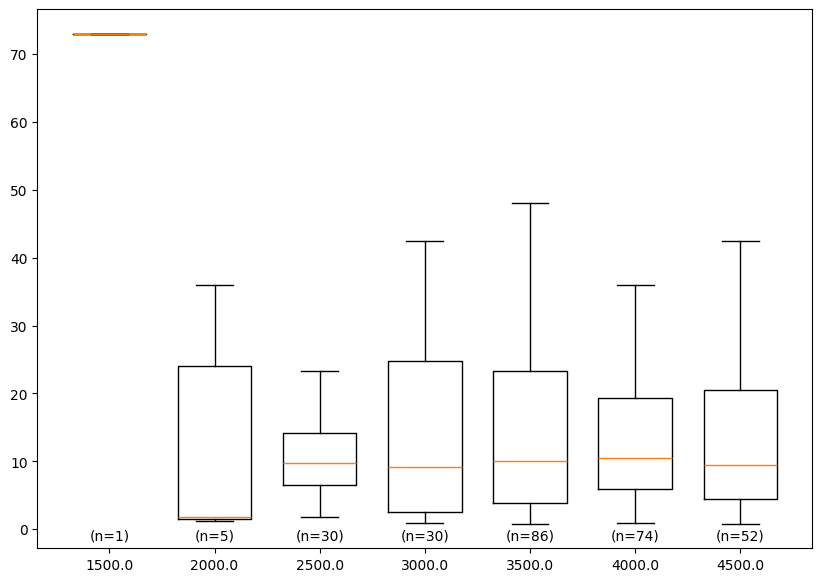

In [53]:
plt.figure(figsize=(10,7))
# affichage des boxplots
# showfliers= False -> n'affiche pas les outliers
plt.boxplot(valeurs, 
            positions= positions,
            showfliers= False, 
            widths= taille*0.7)

# affichage des effectifs de chaque classe
for c in classes:
    plt.text(
        c["centre_classe"],0,"(n={})".format(c["taille"]),
        horizontalalignment='center',
        verticalalignment='top'
    )     
plt.show()

### Coefficient de corrélation linéaire

Le coefficient de corrélation de Pearson ou coefficient de corrélation linéaire permet de compléter numériquement l'analyse de la corrélation.

Ce dernier n'est pertinent que pour évaluer une relation linéaire. Il prend des valeurs entre -1 et 1, et le signe du coefficient indique le sens de la relation.

In [54]:
# Coefficient de Pearson, corrélation linéaire
print(st.pearsonr(depenses["solde_avt_ope"],-depenses["montant"]))
print(st.pearsonr(depenses["solde_avt_ope"],-depenses["montant"])[0])


PearsonRResult(statistic=0.010068819133759201, pvalue=0.8642031213774031)
0.010068819133759201


### Coefficient de covariance

In [55]:
# Coefficient de covariance
print(np.cov(depenses["solde_avt_ope"],-depenses["montant"],ddof=0))
print(np.cov(depenses["solde_avt_ope"],-depenses["montant"],ddof=0)[1,0])

[[422791.93532421    484.95954155]
 [   484.95954155   5486.90249853]]
484.95954154532853


### Analyse de 2 variables quantitatives par régression linéaire

In [56]:
# Selection du sous-échantillon
courses = data[data.categ == "COURSES"]

# On trie les opérations par date
courses = courses.sort_values("date_operation")

# On ramène les montants en positif
courses["montant"] = -courses["montant"]

# calcul de la variable attente
r = []
last_date = dt.datetime.now()
for i,row in courses.iterrows():
    days = (row["date_operation"]-last_date).days
    if days == 0:
        r.append(r[-1])
    else:
        r.append(days)
    last_date = row["date_operation"]
    
courses["attente"] = r
courses = courses.iloc[1:,]

# on regroupe les opérations qui ont été effectués à la même date
# (courses réalisées le même jour mais dans 2 magasins différents)
a = courses.groupby("date_operation")["montant"].sum()
b = courses.groupby("date_operation")["attente"].first()
courses = pd.DataFrame({"montant":a, "attente":b})

courses

,montant,attente
date_operation,,
2023-04-10,42.42,5
2023-04-25,32.67,15
2023-04-26,1.90,1
2023-04-28,9.11,2
2023-05-02,12.24,4
2023-05-04,17.16,2
2023-05-05,3.48,1
2023-05-10,42.45,5
2023-05-15,46.51,5


In [57]:
Y = courses['montant']
X = courses[['attente']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['attente'],result.params['intercept']


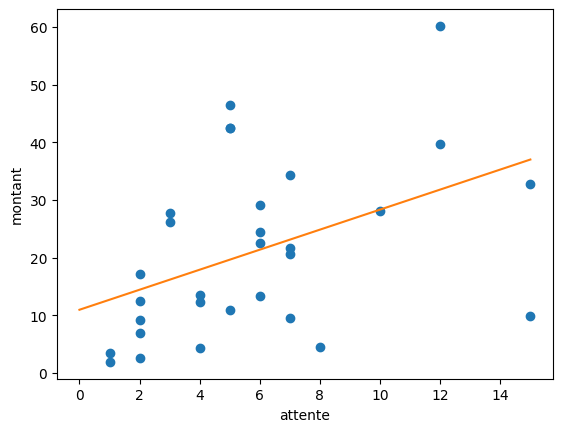

In [58]:
x_n = int(courses['attente'].max()) + 1 

plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange( x_n ), [a*x+b for x in np.arange(x_n)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

## Analyse entre une variable quantitative et qualitative

In [59]:
# Visuel

X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data[data["montant"] < 0].copy()
# On remet les dépenses en positif
sous_echantillon["montant"] = -sous_echantillon["montant"]
# On n'étudie pas les loyers car trop gros:
sous_echantillon = sous_echantillon[sous_echantillon["categ"] != "LOYER"] 


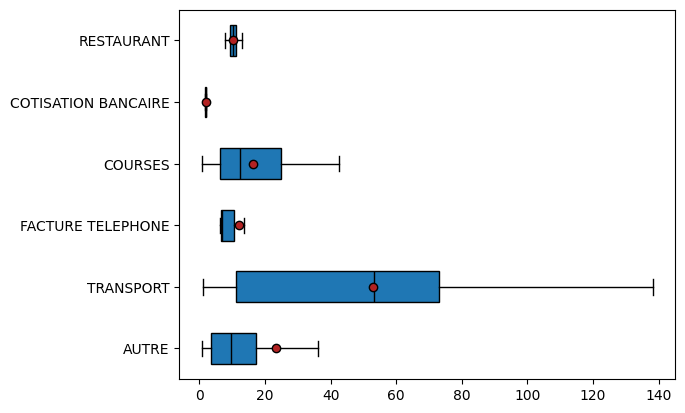

In [61]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [64]:
# Calcul du rapport de corrélation
# Si == 0 aucune corrélation

X = "categ" # qualitative
Y = "montant" # quantitative

sous_echantillon = data[data["montant"] < 0] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

# ICI 0.4 = Laisse à penser une présence de corrélation
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.39841890401094926

## Analyse de 2 variables qualitatives

In [66]:
X = "quart_mois"
Y = "categ"
# Tableau de contingence
cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont


categ,AUTRE,COTISATION BANCAIRE,COURSES,FACTURE TELEPHONE,LOYER,RESTAURANT,TRANSPORT,Total
quart_mois,,,,,,,,
1,55.0,7.0,6.0,6.0,NaN,3.0,9.0,86
2,45.0,NaN,11.0,1.0,6.0,7.0,6.0,76
3,60.0,NaN,7.0,NaN,NaN,4.0,4.0,75
4,52.0,NaN,15.0,NaN,NaN,2.0,2.0,71
Total,212.0,7.0,39.0,7.0,6.0,16.0,21.0,308


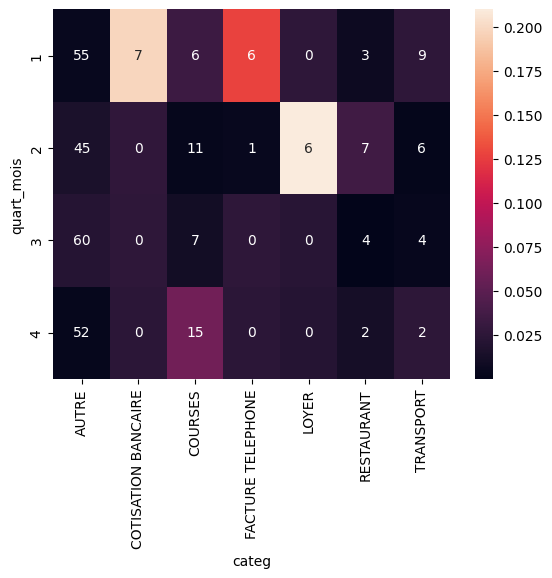

In [71]:
# Mesure de contribution à la non-indépendance
 
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [72]:
data = pd.read_csv('./resources/quizz.csv')
data.head()

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,00:32:23,76,1643543,40
1,2,M,00:32:40,27,1643560,34
2,3,M,00:33:15,76,1643595,44
3,4,M,00:33:23,76,1643603,46
4,5,M,00:33:29,76,1643609,26


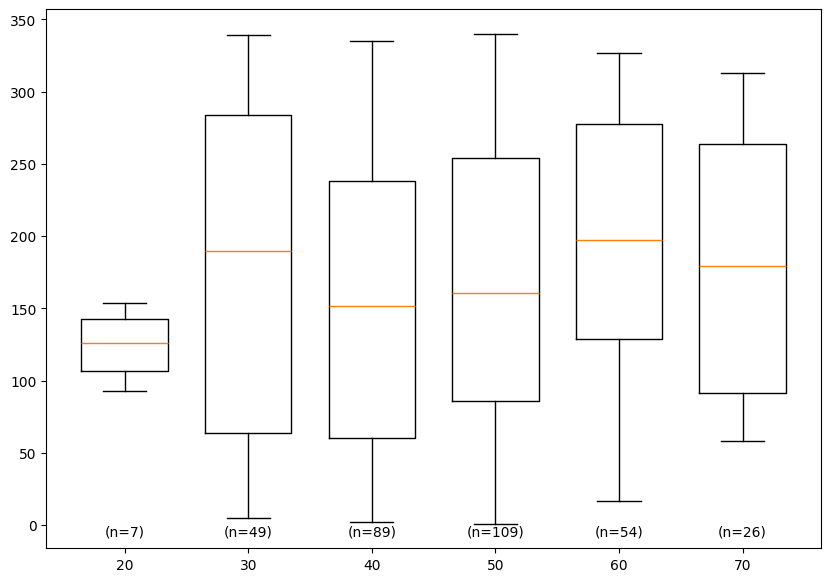

In [88]:
# Discrétion

taille = 10
classes = []

tranches = np.arange(0, max(data['Age']), taille )
indices = np.digitize(data['Age'], tranches)

for i, tranche in enumerate(tranches):    
    montants = data.loc[ indices == i, "Position" ]
    if len(montants) > 0:
        c = {
            'valeurs' : montants,
            'centre_classe' : tranche,
            'taille' : len(montants),
            'quartiles' : [np.percentile(montants, p) for p in [25,50,75]]
        }        
        classes.append(c)
plt.figure(figsize=(10,7))

valeurs = [c["valeurs"] for c in classes]
positions = [c["centre_classe"] for c in classes]

# affichage des boxplots
# showfliers= False -> n'affiche pas les outliers
plt.boxplot(valeurs, 
            positions= positions,
            showfliers= True, 
            widths= taille*0.7)

# affichage des effectifs de chaque classe
for c in classes:
    plt.text(
        c["centre_classe"],0,"(n={})".format(c["taille"]),
        horizontalalignment='center',
        verticalalignment='top'
    )     
plt.show()

In [101]:
# Calcul du rapport de corrélation
# Si == 0 aucune corrélation

X = "Sexe" # qualitative
Y = "Temps_secondes" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_squared(data[X],data[Y])

0.20400517398334017

In [100]:
# R au carré
Y = data['Position']
X = data[["Age"]].copy()
X['intercept'] = 1
result = sm.OLS(Y, X).fit()

a,b = result.params
print(a, b, result.rsquared)

0.8621766194622954 134.33169081355675 0.011249764860875588


### Méthode de sélection de variable

Les méthodes de filtrages sont généralement utilisées comme étape de pré-traitement. Ici, la sélection des variables est indépendante de tout algorithme du machine learning. Au lieu de cela, les variables sont sélectionnées sur la base de leur score dans divers tests
statistiques pour leur corrélation avec la variable à prédire. La corrélation ici est un terme subjectif, les variables avec la corrélation la plus élevé sont les meilleurs.

- Continue / Continue : correlation de Pearson ou la correlation de Spearman
- Continue / catégorielle : La régression logistique
- Catégorielle / Continue : Anova
- Catégorielle / Catégorielle : Chi-carré